In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# 1. Load the data into the pandas environment and identify some basic details of the dataset
   

In [2]:
data=pd.read_csv(r"C:\Users\DELNA ROSE\Downloads\employee.csv")
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [4]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# 2. Reset the index as "name".

In [5]:
data_df=data.set_index('name')
data_df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [6]:
rowdata = data_df.loc[ ['Jack Morgan' , 'Josh Wills']]
rowdata

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [7]:
multi_values = data_df[data_df['department'].isin(['Sales', 'Finance'])]
multi_values

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [8]:
more_performance=data[(data["performance_score"]>700)]
more_performance

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [9]:
employee_performance=data[(data["performance_score"]>500)&(data["performance_score"]<700)]
employee_performance

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [10]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [11]:
data.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [25]:
data_df['age']=data_df['age'].fillna(data_df['age'].median())
data_df['income']=data_df['income'].fillna(data_df['income'].median())

In [26]:
data_df.isna().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [27]:
data_df['gender']=data_df['gender'].fillna(data_df['gender'].mode()[0])


In [28]:
data_df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using      Percentiles.

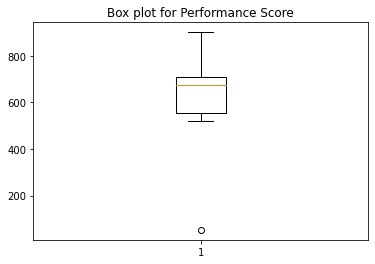

In [14]:
plt.boxplot(data_df[["performance_score"]])
plt.title("Box plot for Performance Score")
plt.show()


In [15]:
Q1=np.percentile(data_df["performance_score"],25,interpolation="midpoint")
Q2=np.percentile(data_df["performance_score"],50,interpolation="midpoint")
Q3=np.percentile(data_df["performance_score"],75,interpolation="midpoint")

print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [16]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)

323.5
943.5


In [17]:
outlier=[]
for x in data_df["performance_score"]:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier
    

[53]

In [18]:
ind2=data_df['performance_score']<low_lim
data_df.loc[ind2].index


Index(['James Authur'], dtype='object', name='name')

In [19]:
data_df.drop(['James Authur'],inplace=True)

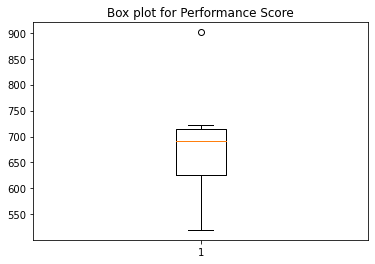

In [20]:
plt.boxplot(data_df[["performance_score"]])
plt.title("Box plot for Performance Score")
plt.show()

# 9. Check the gender column and do Dummy encoding.

In [21]:
data_df["gender"]

name
Allen Smith      NaN
S Kumar            F
Jack Morgan        M
Ying Chin          F
Dheeraj Patel      F
Satyam Sharma    NaN
Josh Wills         F
Leo Duck           M
Name: gender, dtype: object

In [29]:
pd.get_dummies(data_df['gender'])

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


# 10.Do the standard scaling on the feature performance score.

In [23]:
data_df['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [24]:
new_array=np.array(data_df['performance_score']).reshape(-1, 1)

from sklearn import preprocessing

standardisation=preprocessing.StandardScaler()
data_df_StdScaled=standardisation.fit_transform(new_array)

data_df_StdScaled=pd.DataFrame(data_df_StdScaled)
data_df_StdScaled.describe()
 

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
